In [17]:
import pandas as pd
import numpy as np
import os
import keras
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
CATEGORIES = ['cats', 'dogs']
EPOCHS = 10
TEST_SET = 0.30


In [18]:
def LoadDataFromDirectory(dataDir : str):
    images = []
    labels = []
    for Category in CATEGORIES:
        singleCategory = os.path.join(dataDir, str(Category))
        
        for image in os.listdir(singleCategory):
            imagsPaths = os.path.join(singleCategory, image)
            
            finalImages = cv2.imread(imagsPaths)
            
            if finalImages is None:
                raise Exception("The directory is null or Empty")
            
            #64 x 64
            img = cv2.resize(finalImages, (64,64))
            images.append(img)
            labels.append(CATEGORIES.index(Category))
    
    return (np.array(images), np.array(labels))
            
        

In [19]:
images, labels = LoadDataFromDirectory("CatsVsDogs/train")

X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SET, shuffle=True
)

print(f"X train shape: {X_train.shape}")
print(f"Y train shape: {Y_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"Y test shape: {Y_test.shape}")


X train shape: (14000, 64, 64, 3)
Y train shape: (14000,)
X test shape: (6000, 64, 64, 3)
Y test shape: (6000,)


In [20]:
def RestNet50(input_shape = (64,64,3), classes=2, training=False):
    X_input = keras.Input(shape=input_shape)
    
    X = keras.layers.ZeroPadding2D((3,3))(X_input)
    
    #First Block
    Z1 = keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=2)(X)
    B1 = keras.layers.BatchNormalization(axis=3)(Z1)
    A1 = keras.layers.ReLU()(B1)
    P1 = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid")(A1)
    
    #Second Block
    Z2 = keras.layers.Conv2D(filters=32, kernel_size=(4,4), strides=2)(P1)
    B2 = keras.layers.BatchNormalization(axis=3)(Z2)
    A2 = keras.layers.ReLU()(B2)
    P2 = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding="same")(A2)
    
    X_FLATTEN = keras.layers.Flatten()(P2)
    output = keras.layers.Dense(units=classes, activation="softmax")(X_FLATTEN)
    
    model = keras.Model(X_input, output)
    
    return model
    

In [ ]:
ConvModel = RestNet50((64,64,3), 2)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

# Compilar
ConvModel.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Y_train_cat = to_categorical(Y_train, num_classes=2)
Y_test_cat  = to_categorical(Y_test, num_classes=2)

history = ConvModel.fit(X_train, Y_train_cat, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test_cat))
ConvModel.summary()

Epoch 1/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.6528 - loss: 0.6363 - val_accuracy: 0.6563 - val_loss: 0.6231
Epoch 2/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.7254 - loss: 0.5401 - val_accuracy: 0.6382 - val_loss: 0.6828
Epoch 3/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.7654 - loss: 0.4891 - val_accuracy: 0.7842 - val_loss: 0.4602
Epoch 4/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.7833 - loss: 0.4574 - val_accuracy: 0.7688 - val_loss: 0.4858
Epoch 5/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8059 - loss: 0.4180 - val_accuracy: 0.7942 - val_loss: 0.4591
Epoch 6/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8232 - loss: 0.3916 - val_accuracy: 0.7998 - val_loss: 0.4407
Epoch 7/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.8410 - loss: 0.3610 - val_accuracy: 0.7175 - val_loss: 0.6303
Epoch 8/10
3500/3500 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.8510 -

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zero_padding2d_6                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 6, 6, 32)       │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           578 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,320 (505.16 KB)

 Trainable params: 43,042 (168.13 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 86,086 (336.28 KB)

/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_18081/974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/var/folders/64/_d7wbs111535lmdv26qfwp000000gn/T/ipykernel_18081/974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

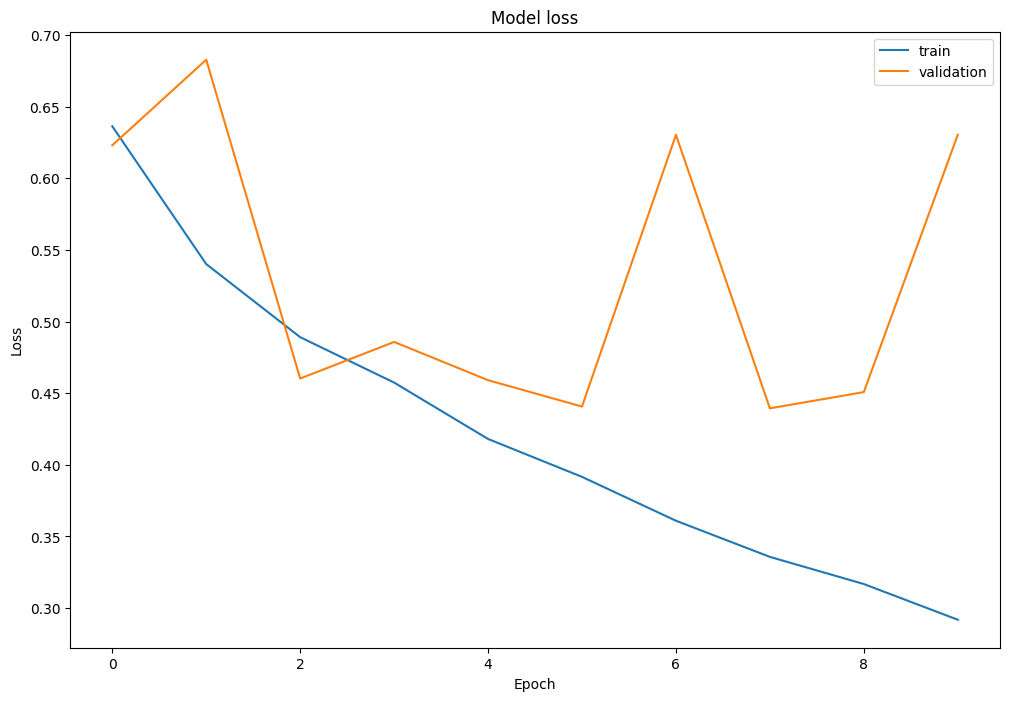

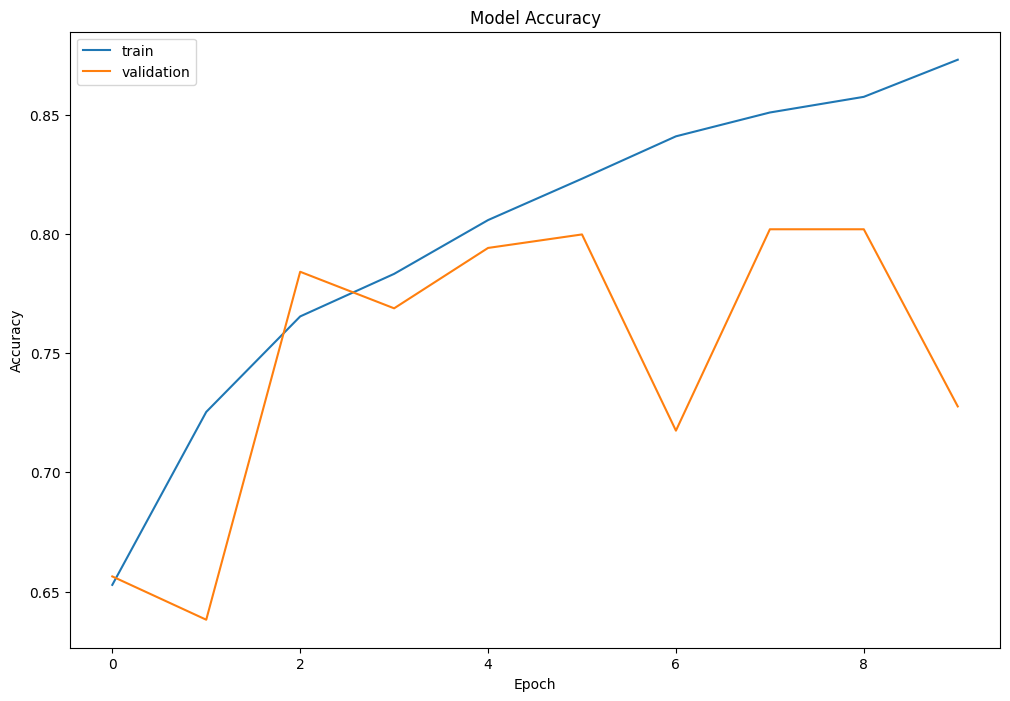

In [22]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')